In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
from tqdm import tqdm
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from Bio import SeqIO
from collections import Counter
from glob import glob


import sys 

sys.path.append('/home/groups/dpwall/briannac/blood_microbiome/src/abundance/')
from abundance_plots import AbundancePlotSettingsAndSave
from abundance_plots import abundance_plot_settings

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
virus_pvals_file = BLOOD_MICROBIOME_DIR + 'results/lasso/virus_pvals.csv'
bacteria_pvals_file = BLOOD_MICROBIOME_DIR + 'results/lasso/bacteria_pvals.csv'
virus_file = BLOOD_MICROBIOME_DIR + 'data/virus_filtered.csv'
bacteria_file = BLOOD_MICROBIOME_DIR + 'data/bacteria_filtered.csv'

fig_dir = BLOOD_MICROBIOME_DIR + 'results/contaminants'

In [38]:
# Read in data
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
df_bacteria = pd.read_csv(bacteria_file, index_col=0)
df_virus  = pd.read_csv(virus_file, index_col=0)

df_virus['sex'] = bam_mappings.loc[[i.split(' ')[0] for i in df_virus.index]].sex_numeric.values
df_virus['relationship'] = bam_mappings.loc[[i.split(' ')[0] for i in df_virus.index]].relationship.values
df_virus['asd'] = bam_mappings.loc[[i.split(' ')[0] for i in df_virus.index]].derived_affected_status.values


df_bacteria['sex'] = bam_mappings.loc[[i.split(' ')[0] for i in df_bacteria.index]].sex_numeric.values
df_bacteria['relationship'] = bam_mappings.loc[[i.split(' ')[0] for i in df_bacteria.index]].relationship.values
df_bacteria['asd'] = bam_mappings.loc[[i.split(' ')[0] for i in df_bacteria.index]].derived_affected_status.values

virus_pvals = pd.read_csv(virus_pvals_file, index_col=0)
bacteria_pvals = pd.read_csv(bacteria_pvals_file, index_col=0)


# Virus

In [28]:
# Set up hits.
r, c = np.where(virus_pvals<(.05/(len(virus_pvals)+len(bacteria_pvals))))
hits = [(virus_pvals.index[i],virus_pvals.columns[j]) for i,j in zip(r,c)]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
sex_hits = [(i[0],i[1].replace('sex_numeric_', '')) for i in sex_hits]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
asd_hits = [(i[0],i[1].replace('derived_affected_status_', '')) for i in asd_hits]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
relationship_hits = [(i[0],i[1].replace('relationship_', '')) for i in relationship_hits]



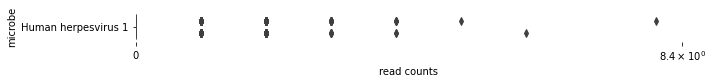

In [26]:
hit_microbes = [i[0] for i in sex_hits]
df_melt = pd.melt(df_virus[hit_microbes + ['sex']].reset_index(), id_vars=['sample', 'sex'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,1.2))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='sex', hue_order=['1.0','2.0'])#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)

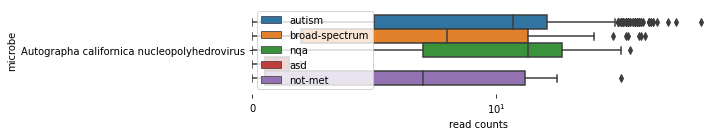

In [32]:
hit_microbes = [i[0] for i in asd_hits]
df_melt = pd.melt(df_virus[hit_microbes + ['asd']].reset_index(), id_vars=['sample', 'asd'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,2))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='asd')#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
plt.legend()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)

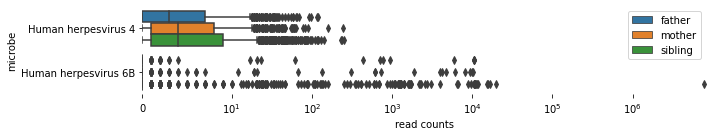

In [34]:
hit_microbes = [i[0] for i in relationship_hits]
df_melt = pd.melt(df_virus[hit_microbes + ['relationship']].reset_index(), id_vars=['sample', 'relationship'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,2))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='relationship')#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
plt.legend()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)

# Bacteria

In [36]:
# Set up hits.
r, c = np.where(bacteria_pvals<(.05/(len(bacteria_pvals)+len(bacteria_pvals))))
hits = [(bacteria_pvals.index[i],bacteria_pvals.columns[j]) for i,j in zip(r,c)]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
sex_hits = [(i[0],i[1].replace('sex_numeric_', '')) for i in sex_hits]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
asd_hits = [(i[0],i[1].replace('derived_affected_status_', '')) for i in asd_hits]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
relationship_hits = [(i[0],i[1].replace('relationship_', '')) for i in relationship_hits]



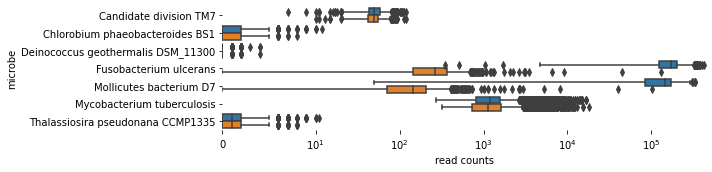

In [46]:
hit_microbes = [i[0] for i in sex_hits]
df_bacteria['sample'] = df_bacteria.index
df_bacteria.index = df_bacteria['sample']
df_melt = pd.melt(df_bacteria[hit_microbes + ['sex']].reset_index(), id_vars=['sample', 'sex'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,2.5))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='sex', hue_order=['1.0','2.0'])#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)

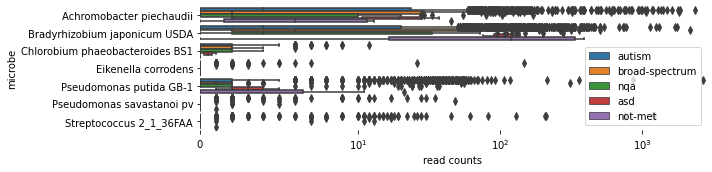

In [47]:
hit_microbes = [i[0] for i in asd_hits]
df_melt = pd.melt(df_bacteria[hit_microbes + ['asd']].reset_index(), id_vars=['sample', 'asd'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,2.5))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='asd')#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
plt.legend()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)

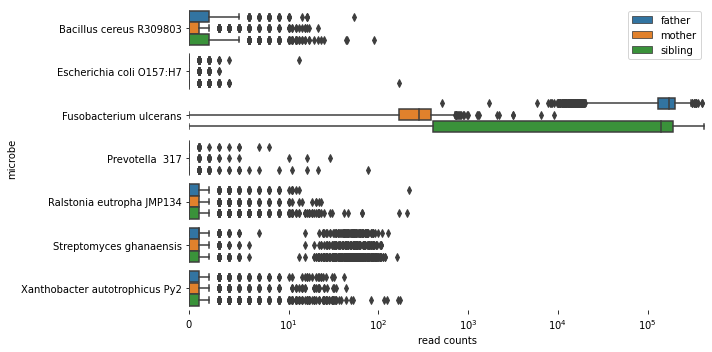

In [49]:
hit_microbes = [i[0] for i in relationship_hits]
df_melt = pd.melt(df_bacteria[hit_microbes + ['relationship']].reset_index(), id_vars=['sample', 'relationship'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)
df_melt = df_melt.sort_values('microbe')

plt.figure(figsize=(10,5))
sns.boxplot(data=df_melt, x='read counts', y='microbe', hue='relationship')#, fliersize=0, whis=100)#, jitter=.2)
#sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='bio_seq_source', hue_order=['LCL','WB'], jitter=.2)
abundance_plot_settings()
plt.legend()
#plt.savefig('%s/virus_associated_with_WB.png' % fig_dir, 
#            transparent=True, bbox_inches='tight', format='png', dpi=500)